# The Coupon Collector’s Problem

Suppose each box contains a coupon, and there are *n* distinct coupons. Also, suppose that a collector desires to collect all possible distinct coupons. Whenever the collector collects a coupon, they send it for a prize. 

**Problem Statement:** How many boxes should the collector buy in order to collect all possible ditinct coupons?

In this problem, we assume the following:
1. The coupon in each box is chosen independently and uniformly at random from the *n* possiblities.
2. The collector does not collaborate with other to collect coupons.ns

## Analysis

Let:
* $X$ = the number of boxes bought until at least one of every type of coupon is collected; hence, $X$ is a random variable.
* $E[X]$ = expected number of boxes bough until at least one of every type of coupon is collected.
* $X_i$ = the number of boxes bought until the collector has exactly $i - 1$ distinct coupons.

We can write the following:
$$ X = \sum_{i=1}^n X_i $$

By doing so, we decompose the random variable $X$ into a sum of $n$ random varaibles $X_i | i = 1, ..., n$. This means that each $X_i$ is a *geometric* random variable (**"until"**).

Now, suppose that the collector has collected exactly $i - 1$ coupons. We ask the following:

**Key Q:** What is the probability of obtaining a new coupon?
**A**: Let $Pr[$Obtaining i<sup>th</sup> distinct coupon$] = p_i$.
Then:
$$p_i = 1 - \frac{i-1}{n}$$.
To see this, observe that: $Pr[$Obtaining one of the (i-1)<sup>th</sup> coupons$] = \displaystyle\frac{i-1}{n}$, and hence the probability of obtaining none of these $(i-1)$ coupons already obtained is the complement.

As we mentioned earlier, $X_i$ is a geometric variable and its parameter is $p_i$. By definition, its mean is given by:
$$E[X_i] = \displaystyle\frac{1}{p_i} = \displaystyle\frac{n}{n-i+1}.$$
This is obtained by:
$$E[X_i] = \displaystyle\frac{1}{p_i} = \displaystyle\frac{1}{\displaystyle\frac{n-i+1}{n}} = \displaystyle\frac{n}{n-i+1}.$$

Now, we can use the linearity of expectations to get:
$$E[X] = E[\sum_{i=1}^n X_i ]$$
$$E[X] = \sum_{i=1}^n E[X_i]$$

Then, by the definition of the mean that we obtained above, we get:
$$E[X] = \sum_{i=1}^n \displaystyle\frac{n}{n-i+1}$$

Now, we can simplify further by a *change of index* [[2]](https://math.stackexchange.com/questions/2434276/moving-index-in-a-summation-how-does-that-work). Let $j = n-i+1$. Then, when $i=1, j=n$, and when $i=n, j=1$. This reserves the order of the summation, so we now need to rewrite the sum in terms of $j$:
$$\sum_{i=1}^n \displaystyle\frac{n}{n-i+1} = \sum_{j=n}^1 \displaystyle\frac{n}{j}$$
Summation order does't matter: Summing from $j=n$ to $j=1$ is tantamount to summing from $j=1$ to $j=n$. Hence, we can flip the summation indices and write it as such:
$$ \sum_{j=1}^n \displaystyle\frac{n}{j} $$

Now, we can factor out $n$:
$$ n\sum_{j=1}^n \displaystyle\frac{1}{j} $$

Finally, $j$ is just a *dummy* variable; therefore, we end up with:
$$ E[X] = n\sum_{i=1}^n \displaystyle\frac{1}{i} $$

This summation $\sum_{i=1}^n \displaystyle\frac{1}{i}$ is known as the *harmonic number* [[3]](https://www.math.drexel.edu/~tolya/123_harmonic.pdf), which is defined as:
$$H(n) = ln(n) + \gamma$$. Therefore, the expected number of boxes the collector has to buy in order to obtain all $n$ distinct coupons is:
$$E[X] = n~ln(n) + \gamma \cdot n$$

Here, $\gamma$ is called *Euler's constant* and its value is: $\gamma = 0.57721566490153286060$ (check [[3]](https://www.math.drexel.edu/~tolya/123_harmonic.pdf) and [[4]](https://en.wikipedia.org/wiki/Euler's_constant)).

## A Simulation

We can write a function to simulate the number of boxes bought to collect some $n$ distinct coupons alongside a function that returns the theoretical expected number of boxes that need to be bought in order to collect the $n$ coupons:

In [21]:
import random
import math

def collect_coupons(n):
    coupons = set()
    boxes_bought = 0
    while len(coupons) < n:
        new_coupon = random.randint(1,n)
        coupons.add(new_coupon)
        boxes_bought += 1
    return boxes_bought

def coupon_collector_approximation(n):
    euler_const = 0.57721566490153286060
    return n*math.log(n) + n*euler_const

n = 50     # 50 distinct coupons
print(f"Number of boxes bought to collect all {n} coupons: {collect_coupons(n)}")
print(f"Theoretical expected number of boxes required to collect all {n} coupons: {coupon_collector_approximation(n)}")

Number of boxes bought to collect all 50 coupons: 275
Theoretical expected number of boxes required to collect all 50 coupons: 224.46193351648395


We can write a Monte Carlo simulation to see how the average compare to the theoretical expectation:

In [22]:
def MC_coupon_collector(n, num_trials):
    total_boxes = sum(collect_coupons(n) for _ in range(num_trials))
    avg_boxes = total_boxes / num_trials

    return avg_boxes

We can test it:

In [26]:
num_trials = 10
print(f"Average number of boxes needed to collect all {n} coupons (Monte Carlo simulation): {MC_coupon_collector(n, 100)}")

Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 217.98


We can plot the number of trials against the average number of boxes:

Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 196.5
Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 228.77
Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 226.2
Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 225.1716
Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 225.10526
Average number of boxes needed to collect all 50 coupons (Monte Carlo simulation): 225.007974


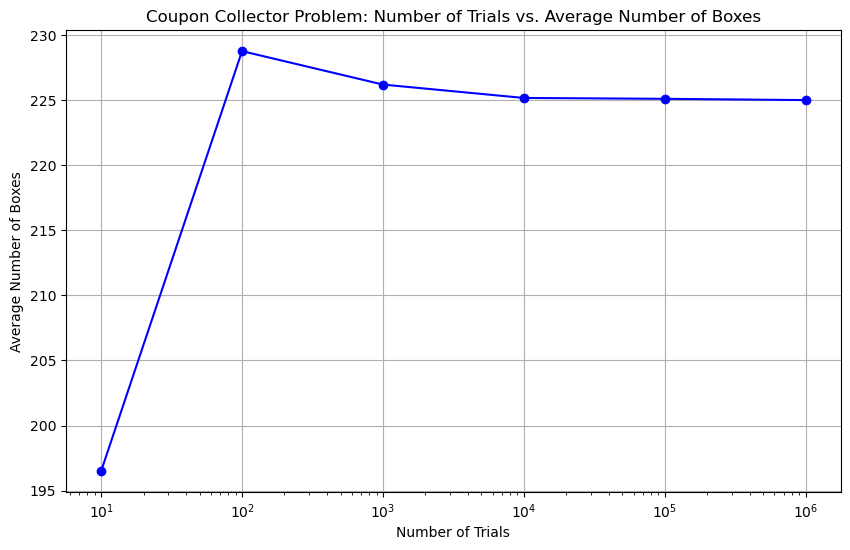

In [27]:
import matplotlib.pyplot as plt

trial_counts = [10, 100, 1000, 10000, 100000, 1000000]
average_boxes = []

for num_trials in trial_counts:
    avg_boxes = MC_coupon_collector(n, num_trials)
    average_boxes.append(avg_boxes)
    print(f"Average number of boxes needed to collect all {n} coupons (Monte Carlo simulation): {avg_boxes}")


plt.figure(figsize=(10, 6))
plt.plot(trial_counts, average_boxes, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Average Number of Boxes')
plt.title('Coupon Collector Problem: Number of Trials vs. Average Number of Boxes')
plt.grid(True)
plt.show()

As indicated by the simulation, when the *number of trials* aproaches $\infty$, the average approaches $224.46193351648395$ (the value given by the theoretical expectation).

## References:
[1] Mitzenmacher, Michael, and Eli Upfal. *Probability and computing: Randomization and probabilistic techniques in algorithms and data analysis.* Cambridge university press, 2017.\
[2] https://en.wikipedia.org/wiki/Euler's_constant \
[3] https://www.math.drexel.edu/~tolya/123_harmonic.pdf \
[4] https://en.wikipedia.org/wiki/Euler's_constant